In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [8.0, 8.0]
%matplotlib inline

import pickle
import os

import PyLTSpice as pyLT

import itertools
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k']) 
markers = itertools.cycle(('v', '+', '.', 'o', '*', "s")) 

In [2]:
def plot_data(ax, data, color='b', marker='-o', name='', R_meas=94):
    for i in data.keys():
        VGS = data[i]["VGS"]
        if i == 0:
            ax.plot(data[i]["VDS"], np.array(data[i]["IDS"])*1000/R_meas, marker, color=color, label=name)
        else:
            ax.plot(data[i]["VDS"], np.array(data[i]["IDS"])*1000/R_meas, marker, color=color)
    ax.set_xlabel("VDS [V]")
    ax.set_ylabel("IDS [mA]")
    ax.grid(True)
    ax.legend()

def plot_data_collection(ax, data_collection, R_meas=94):
    for set_name in data_collection.keys():
        plot_data(ax, data_collection[set_name])

In [3]:
sim_filenames = [ "sims/nmos_IV_4x_1x_diode_IDS_VGS.raw" ]
log_filenames = [ "sims/nmos_IV_4x_1x_diode_IDS_VGS.log" ]
LTR = pyLT.RawRead(sim_filenames[0])
LTL = pyLT.LTSpiceLogReader(log_filenames[0])
# step_values = LTL.stepset[LTL.get_step_vars()[0]]
# LTR.get_trace_names()

In [4]:
sim_1x_diode_data = {'sim': {0: {'VGS': 0}}}
sim_1x_diode_data['sim'][0]['VDS'] = LTR.get_trace("vgs").get_wave()
sim_1x_diode_data['sim'][0]['IDS'] = LTR.get_trace("Ix(x8:IN)").get_wave()

In [5]:
folder = './'
# filename = 'nMOS_CM_ids_vds_pm2v5_range.pickle'
filename = 'nMOS_CM_diodes_ids_vds_pm2v5_range.pickle'
file = os.path.join(folder, filename)
if not os.path.exists(file):
    print(f"{file} does not exist -- DATA NOT LOADED")
else:
    with open(file, 'rb') as dbfile_read:
        data_collection_diode = pickle.load(dbfile_read)

In [6]:
data_collection = data_collection_diode
data_collection.keys()

dict_keys(['nMOS_CM1_diode', 'nMOS_CMlarge_diode'])

In [7]:
model_scaling = 0.8

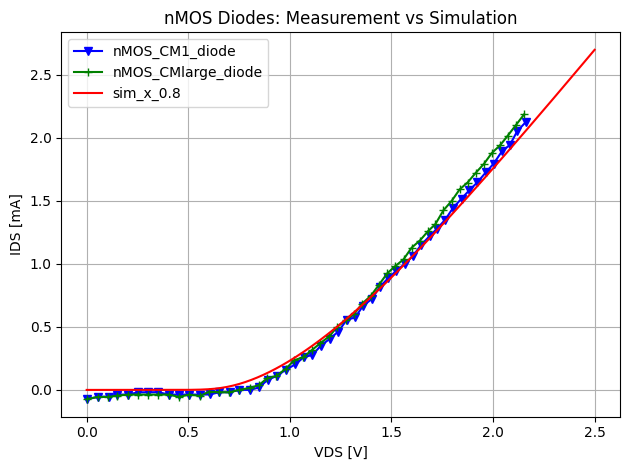

In [8]:
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k']) 
markers = itertools.cycle(('v', '+', '.', 'o', '*', "s")) 

sim_scaling = model_scaling
no_meas = len(data_collection.keys())
fig, ax = plt.subplots()
for index, name in enumerate(data_collection):
    plot_data(ax, data_collection[name], color=next(colors), marker=next(markers)+'-', name=name, R_meas=94)
# ax.get_legend().remove()
# plot_data(ax, sim_1x_diode_data['sim'], marker=next(markers), color=next(colors), name="sim", R_meas=1)
plot_data(ax, sim_1x_diode_data['sim'], marker='-', color=next(colors), name=f'sim_x_{sim_scaling}', R_meas=1/sim_scaling)

ax.set_title('nMOS Diodes: Measurement vs Simulation')
fig.tight_layout()

In [9]:
sim_filenames = [ "sims/nmos_IV_4x_1x_IDS_VDS.raw" ]
log_filenames = [ "sims/nmos_IV_4x_1x_IDS_VDS.log" ]
LTR = pyLT.RawRead(sim_filenames[0])
LTL = pyLT.LTSpiceLogReader(log_filenames[0])
step_values = LTL.stepset[LTL.get_step_vars()[0]]
step_values
# LTR.get_trace_names()

[0.75, 1, 1.25, 1.5, 1.75, 2, 2.25]

In [10]:
spice_device_names = {'1x': 'Ix(x8:out1)'} # there is only need for one sim at this point since the scaling is perfect

In [11]:
sim_cm_data = {}
for label, trace_name in spice_device_names.items():
    sim_cm_data[label] = {}
    for step in LTR.get_steps():
        sim_cm_data[label][step] = {}
        sim_cm_data[label][step]['VGS'] = step_values[step]
        sim_cm_data[label][step]['VDS'] = LTR.get_trace("vds").get_wave(step)
        sim_cm_data[label][step]['IDS'] = LTR.get_trace(trace_name).get_wave(step)

In [12]:
folder = './'
filename = 'nMOS_CM_ids_vds_pm2v5_range.pickle'
file = os.path.join(folder, filename)
if not os.path.exists(file):
    print(f"{file} does not exist -- DATA NOT LOADED")
else:
    with open(file, 'rb') as dbfile_read:
        data_collection_cm = pickle.load(dbfile_read)

In [13]:
data_collection = data_collection_cm
data_collection.keys()

dict_keys(['nMOS_CM_1x', 'nMOS_CM_2x', 'nMOS_CM_4x', 'nMOS_CM_8x'])

In [14]:
model_scaling = 0.8

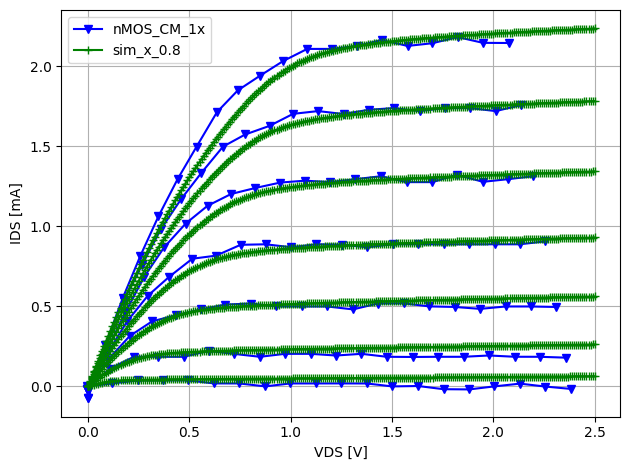

In [15]:
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k']) 
markers = itertools.cycle(('v', '+', '.', 'o', '*', "s")) 

sim_scaling = model_scaling * 1
name = list(data_collection.keys())[0]
fig, ax = plt.subplots()
plot_data(ax, data_collection[name], color=next(colors), marker=next(markers)+'-', name=name, R_meas=94)
plot_data(ax, sim_cm_data['1x'], color=next(colors), marker=next(markers)+'-', name=f'sim_x_{sim_scaling}', R_meas=1/sim_scaling)
fig.tight_layout()

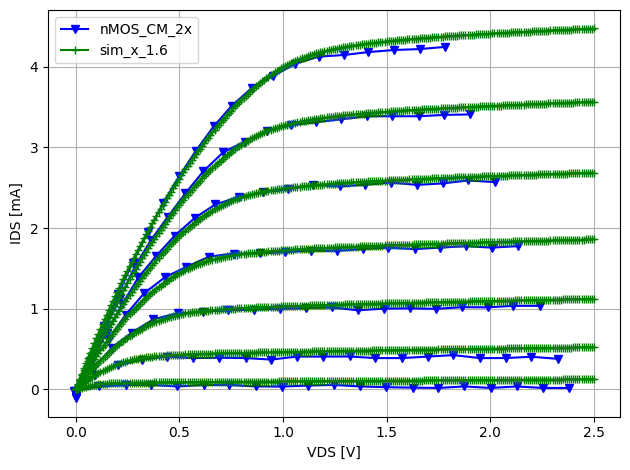

In [16]:
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k']) 
markers = itertools.cycle(('v', '+', '.', 'o', '*', "s")) 

sim_scaling = model_scaling * 2
name = list(data_collection.keys())[1]
fig, ax = plt.subplots()
plot_data(ax, data_collection[name], color=next(colors), marker=next(markers)+'-', name=name, R_meas=94)
plot_data(ax, sim_cm_data['1x'], color=next(colors), marker=next(markers)+'-', name=f'sim_x_{sim_scaling}', R_meas=1/sim_scaling)
# ax.get_legend().remove()
fig.tight_layout()

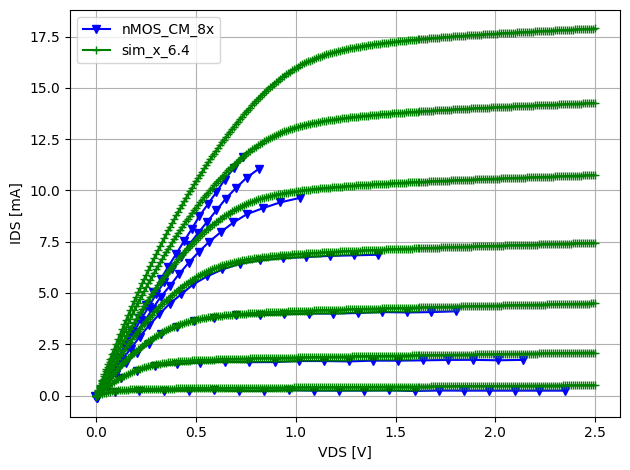

In [17]:
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k']) 
markers = itertools.cycle(('v', '+', '.', 'o', '*', "s")) 

sim_scaling = model_scaling * 8
name = list(data_collection.keys())[3]
fig, ax = plt.subplots()
plot_data(ax, data_collection[name], color=next(colors), marker=next(markers)+'-', name=name, R_meas=94)
plot_data(ax, sim_cm_data['1x'], color=next(colors), marker=next(markers)+'-', name=f'sim_x_{sim_scaling}', R_meas=1/sim_scaling)
# ax.get_legend().remove()
fig.tight_layout()

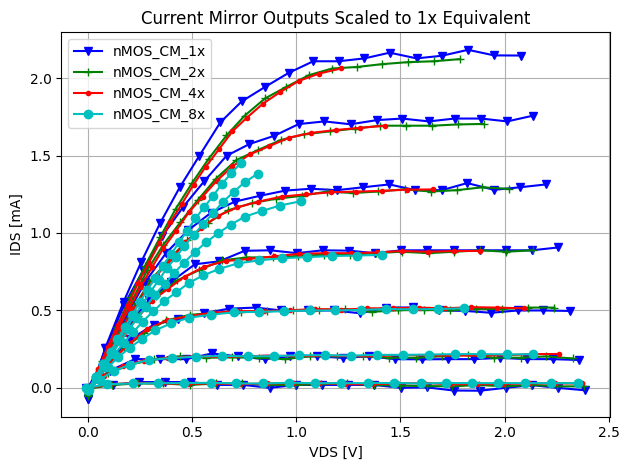

In [18]:
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k']) 
markers = itertools.cycle(('v', '+', '.', 'o', '*', "s")) 

no_meas = len(data_collection.keys())
fig, ax = plt.subplots()
for index, name in enumerate(data_collection):
    plot_data(ax, data_collection[name], color=next(colors), marker=next(markers)+'-', name=name, R_meas=94*2**index)
ax.set_title('Current Mirror Outputs Scaled to 1x Equivalent')
fig.tight_layout()

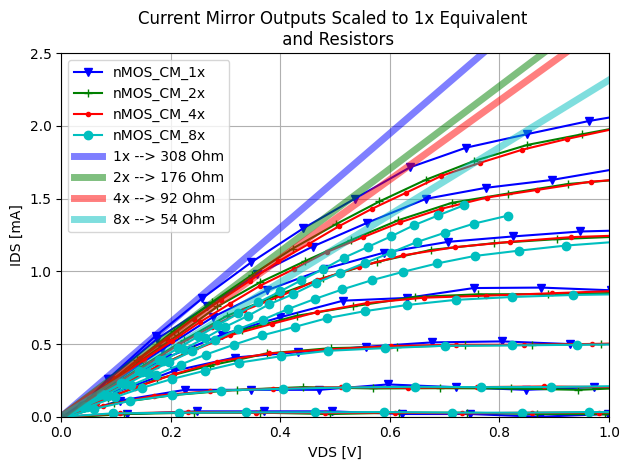

In [19]:
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k']) 
markers = itertools.cycle(('v', '+', '.', 'o', '*', "s")) 

no_meas = len(data_collection.keys())
fig, ax = plt.subplots()
for index, name in enumerate(data_collection):
    plot_data(ax, data_collection[name], color=next(colors), marker=next(markers)+'-', name=name, R_meas=94*2**index)

colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k']) 
markers = itertools.cycle(('v', '+', '.', 'o', '*', "s")) 
for res, dev_scale in [(308, 1), (176, 2), (92, 4), (54, 8)]:
    vds = np.arange(0, 2.0, 0.05)
    ids_r = vds/res/dev_scale*1000
    ax.plot(vds, ids_r, '-', color=next(colors), label=f'{dev_scale}x --> {res} Ohm', lw=5, alpha=0.5)

ax.legend()
ax.set_title('Current Mirror Outputs Scaled to 1x Equivalent \n and Resistors')
ax.set_xlim((0, 1.0))
ax.set_ylim((0, 2.5))
fig.tight_layout()

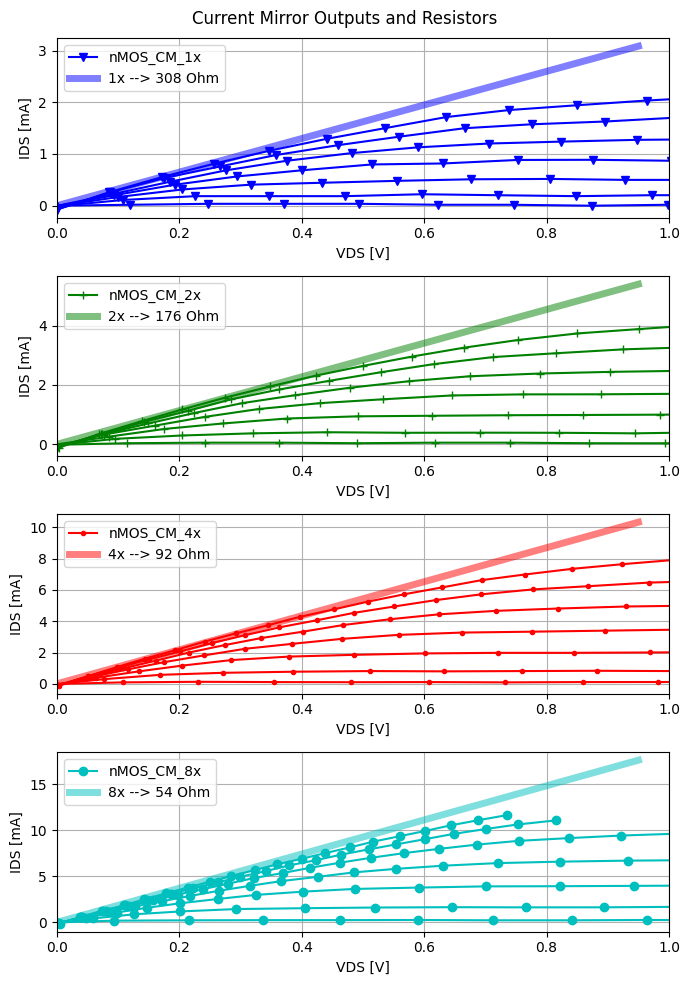

In [20]:
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k']) 
markers = itertools.cycle(('v', '+', '.', 'o', '*', "s")) 

no_meas = len(data_collection.keys())
fig, ax3 = plt.subplots(no_meas, figsize=(7,10))
for index, name in enumerate(data_collection):
    ax=ax3[index]
    color=next(colors)
    marker=next(markers)
    plot_data(ax, data_collection[name], color=color, marker=marker+'-', name=name, R_meas=94)
    res, dev_scale = [(308, 1), (176, 2), (92, 4), (54, 8)][index]
    vds = np.arange(0, 1.0, 0.05)
    ids_r = vds/res*1000
    ax.plot(vds, ids_r, '-', color=color, label=f'{dev_scale}x --> {res} Ohm', lw=5, alpha=0.5)
    ax.set_xlim((0, 1.0))
    # ax.set_ylim((0, 2.5))
    ax.legend()

plt.suptitle('Current Mirror Outputs and Resistors')

fig.tight_layout()